In [1]:
#from selenium import webdriver

from requests import get
from requests.exceptions import RequestException
#from contextlib import closing
from bs4 import BeautifulSoup

In [2]:
#read page
URL = 'https://za.national-lottery.com/daily-lotto/results-archive-2019'
page = get(URL)


In [3]:
#play around
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(id='content')
print(results)

<div class="page" id="content">
<h1>Daily Lotto Results Archive 2019</h1>
<p>Click on a result date to view further information on that draw.</p>
<table class="table daily-lotto" style="width: 100%;">
<tr>
<th style="text-align: center;">Draw Date</th></tr></table></div>


In [5]:
#even more play
print(results.prettify())

<div class="page" id="content">
 <h1>
  Daily Lotto Results Archive 2019
 </h1>
 <p>
  Click on a result date to view further information on that draw.
 </p>
 <table class="table daily-lotto" style="width: 100%;">
  <tr>
   <th style="text-align: center;">
    Draw Date
   </th>
  </tr>
 </table>
</div>


In [6]:
#finishing games here
results.find_all( class_='table daily-lotto')

[<table class="table daily-lotto" style="width: 100%;">
 <tr>
 <th style="text-align: center;">Draw Date</th></tr></table>]

In [7]:
import pandas as pd
import numpy as np

In [8]:
#pandas frame in a list
df_list = pd.read_html(page.content)

In [9]:
df_list

[                     Draw Date             Results  Number of Winners
 0     Tuesday 31 December 2019     2  4  5  26  29              96574
 1      Monday 30 December 2019   7  13  14  17  30              85998
 2      Sunday 29 December 2019   4  12  16  34  36              55737
 3    Saturday 28 December 2019  23  29  30  31  32              69756
 4      Friday 27 December 2019   4  13  16  27  35              85261
 ..                         ...                 ...                ...
 291     Thursday 14 March 2019     1  5  9  26  32              61927
 292    Wednesday 13 March 2019   4  10  16  21  35              62994
 293      Tuesday 12 March 2019  11  16  17  29  32              51284
 294       Monday 11 March 2019   7  10  19  24  32              38409
 295       Sunday 10 March 2019    1  7  11  18  34              17089
 
 [296 rows x 3 columns]]

In [10]:
len(df_list[0]['Draw Date'].unique())

296

In [11]:
df_list[0]

,Draw Date,Results,Number of Winners
0,Tuesday 31 December 2019,2 4 5 26 29,96574
1,Monday 30 December 2019,7 13 14 17 30,85998
2,Sunday 29 December 2019,4 12 16 34 36,55737
3,Saturday 28 December 2019,23 29 30 31 32,69756
4,Friday 27 December 2019,4 13 16 27 35,85261
...,...,...,...
291,Thursday 14 March 2019,1 5 9 26 32,61927
292,Wednesday 13 March 2019,4 10 16 21 35,62994
293,Tuesday 12 March 2019,11 16 17 29 32,51284
294,Monday 11 March 2019,7 10 19 24 32,38409


In [12]:
#get latest 2020 winning numbers
url = 'https://za.national-lottery.com/daily-lotto/results-archive-2020'
page2 = get(url)

In [13]:
#make a pandas frame in a list
df_list2 = pd.read_html(page2.content)

In [14]:
df_list2[0]

,Draw Date,Results,Number of Winners
0,Sunday 13 September 2020,14 16 18 23 29,51662
1,Saturday 12 September 2020,1 11 16 18 35,83305
2,Friday 11 September 2020,2 16 25 26 32,94086
3,Thursday 10 September 2020,3 10 17 21 29,88430
4,Wednesday 9 September 2020,12 21 28 29 35,85276
...,...,...,...
252,Sunday 5 January 2020,5 18 21 23 34,52518
253,Saturday 4 January 2020,4 14 24 28 30,78188
254,Friday 3 January 2020,9 14 18 26 30,91047
255,Thursday 2 January 2020,1 6 16 24 34,82786


In [15]:
'so  to be'.split('  ')

['so', 'to be']

In [16]:
df_list2[0]['Results'].apply(lambda x : x.split('  '))

0      [14, 16, 18, 23, 29]
1       [1, 11, 16, 18, 35]
2       [2, 16, 25, 26, 32]
3       [3, 10, 17, 21, 29]
4      [12, 21, 28, 29, 35]
               ...         
252     [5, 18, 21, 23, 34]
253     [4, 14, 24, 28, 30]
254     [9, 14, 18, 26, 30]
255      [1, 6, 16, 24, 34]
256    [14, 17, 21, 22, 29]
Name: Results, Length: 257, dtype: object

In [17]:
df_list[0]['Results'] =df_list[0]['Results'].apply(lambda x : x.split('  '))

In [18]:
df_list2[0]['Results'] =df_list2[0]['Results'].apply(lambda x : x.split('  '))

In [19]:
df_list[0]

,Draw Date,Results,Number of Winners
0,Tuesday 31 December 2019,"[2, 4, 5, 26, 29]",96574
1,Monday 30 December 2019,"[7, 13, 14, 17, 30]",85998
2,Sunday 29 December 2019,"[4, 12, 16, 34, 36]",55737
3,Saturday 28 December 2019,"[23, 29, 30, 31, 32]",69756
4,Friday 27 December 2019,"[4, 13, 16, 27, 35]",85261
...,...,...,...
291,Thursday 14 March 2019,"[1, 5, 9, 26, 32]",61927
292,Wednesday 13 March 2019,"[4, 10, 16, 21, 35]",62994
293,Tuesday 12 March 2019,"[11, 16, 17, 29, 32]",51284
294,Monday 11 March 2019,"[7, 10, 19, 24, 32]",38409


In [20]:
df_list2[0]

,Draw Date,Results,Number of Winners
0,Sunday 13 September 2020,"[14, 16, 18, 23, 29]",51662
1,Saturday 12 September 2020,"[1, 11, 16, 18, 35]",83305
2,Friday 11 September 2020,"[2, 16, 25, 26, 32]",94086
3,Thursday 10 September 2020,"[3, 10, 17, 21, 29]",88430
4,Wednesday 9 September 2020,"[12, 21, 28, 29, 35]",85276
...,...,...,...
252,Sunday 5 January 2020,"[5, 18, 21, 23, 34]",52518
253,Saturday 4 January 2020,"[4, 14, 24, 28, 30]",78188
254,Friday 3 January 2020,"[9, 14, 18, 26, 30]",91047
255,Thursday 2 January 2020,"[1, 6, 16, 24, 34]",82786


In [21]:
#combine 2019 and 2020
daily_lotto_2020 = pd.concat([df_list[0],df_list2[0]]).reset_index()

In [22]:
229 + 296

525

In [23]:
daily_lotto_2020

,index,Draw Date,Results,Number of Winners
0,0,Tuesday 31 December 2019,"[2, 4, 5, 26, 29]",96574
1,1,Monday 30 December 2019,"[7, 13, 14, 17, 30]",85998
2,2,Sunday 29 December 2019,"[4, 12, 16, 34, 36]",55737
3,3,Saturday 28 December 2019,"[23, 29, 30, 31, 32]",69756
4,4,Friday 27 December 2019,"[4, 13, 16, 27, 35]",85261
...,...,...,...,...
548,252,Sunday 5 January 2020,"[5, 18, 21, 23, 34]",52518
549,253,Saturday 4 January 2020,"[4, 14, 24, 28, 30]",78188
550,254,Friday 3 January 2020,"[9, 14, 18, 26, 30]",91047
551,255,Thursday 2 January 2020,"[1, 6, 16, 24, 34]",82786


In [24]:
2635/527 

5.0

In [25]:
#get day with the least wins
daily_lotto_2020[daily_lotto_2020['Number of Winners']==daily_lotto_2020['Number of Winners'].min()]

,index,Draw Date,Results,Number of Winners
413,117,Tuesday 19 May 2020,"[19, 24, 25, 27, 31]",9652


In [26]:
#day with most wins 
daily_lotto_2020[daily_lotto_2020['Number of Winners']==daily_lotto_2020['Number of Winners'].max()]

,index,Draw Date,Results,Number of Winners
213,213,Friday 31 May 2019,"[2, 4, 25, 35, 36]",157391


In [65]:
#number of all possible combinations
from math import comb
comb(36,5)

376992

In [28]:
#days since first daily lotto
len(list(daily_lotto_2020['Results']))

553

In [29]:
daily_lotto_2020['Results'][0]+daily_lotto_2020['Results'][1]

['2', '4', '5', '26', '29', '7', '13', '14', '17', '30']

In [30]:
import json
a = json.dumps(daily_lotto_2020['Results'][0])

In [31]:
a

'["2", "4", "5", "26", "29"]'

In [32]:
json.loads(a)

['2', '4', '5', '26', '29']

In [33]:
#all winning numbers
all_nums = []
for i in daily_lotto_2020['Results']:
    all_nums  +=i
print(all_nums)
print(len(all_nums))

['2', '4', '5', '26', '29', '7', '13', '14', '17', '30', '4', '12', '16', '34', '36', '23', '29', '30', '31', '32', '4', '13', '16', '27', '35', '6', '12', '23', '25', '36', '8', '11', '16', '22', '25', '5', '11', '19', '21', '36', '2', '12', '13', '22', '35', '3', '17', '24', '31', '34', '3', '7', '20', '21', '35', '1', '5', '9', '15', '23', '5', '11', '21', '32', '35', '5', '12', '16', '20', '25', '8', '10', '20', '22', '27', '4', '19', '20', '30', '35', '5', '6', '7', '22', '34', '6', '9', '21', '24', '36', '11', '20', '27', '31', '36', '5', '9', '11', '15', '23', '5', '7', '19', '31', '33', '4', '14', '22', '25', '27', '6', '8', '9', '22', '36', '8', '9', '22', '28', '35', '2', '21', '29', '30', '36', '1', '16', '21', '33', '36', '3', '6', '9', '10', '11', '4', '8', '22', '25', '33', '1', '21', '30', '31', '36', '3', '4', '14', '26', '30', '16', '22', '26', '29', '34', '22', '23', '28', '33', '36', '4', '12', '17', '28', '34', '9', '25', '34', '35', '36', '2', '7', '15', '26', '35'

In [34]:
# Python program to count the frequency of 
# elements in a list using a dictionary 

def CountFrequency(my_list): 

# Creating an empty dictionary 
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    freq={k: v for k, v in sorted(freq.items(), key=lambda item: item[1])}
    for key, value in freq.items(): 
        print (f"{key} : {value}") 

# Driver function 
if __name__ == "__main__": 
    my_list =all_nums 
    CountFrequency(my_list) 


17 : 62
11 : 67
18 : 67
8 : 68
4 : 69
3 : 69
7 : 70
19 : 70
28 : 71
13 : 72
23 : 72
32 : 72
27 : 72
30 : 73
20 : 73
26 : 74
31 : 75
35 : 75
24 : 75
10 : 75
16 : 76
21 : 76
1 : 77
33 : 79
2 : 81
15 : 82
6 : 83
22 : 83
34 : 84
14 : 85
9 : 86
29 : 89
12 : 89
5 : 91
25 : 91
36 : 92


In [35]:
['1', '5', '9', '15', '23'] == ['1', '5', '9', '15', '23']

True

In [36]:
['5', '1', '9', '15', '23'] == ['1', '5', '9', '15', '23']

False

In [37]:
set(['5', '1', '9', '15', '23']) == set(['1', '5', '9', '15', '23'])

True

In [38]:
5 in ['5', '1', '9', '15', '23']

False

In [39]:
'5' in ['5', '1', '9', '15', '23']

True

In [40]:
['5', '1', '9', '15', '23'] in list(list(daily_lotto_2020['Results']))

False

In [41]:
['1', '5', '9', '15', '23'] in list(list(daily_lotto_2020['Results']))

True

In [42]:
#json.dumps(list(daily_lotto_2020['Results']))

In [43]:
sorted(list(daily_lotto_2020['Results']))

[['1', '10', '12', '19', '29'],
 ['1', '11', '12', '27', '35'],
 ['1', '11', '14', '20', '23'],
 ['1', '11', '16', '18', '35'],
 ['1', '11', '16', '24', '31'],
 ['1', '12', '13', '34', '36'],
 ['1', '12', '18', '19', '24'],
 ['1', '12', '21', '33', '34'],
 ['1', '13', '14', '35', '36'],
 ['1', '13', '20', '26', '28'],
 ['1', '13', '22', '23', '27'],
 ['1', '14', '19', '25', '36'],
 ['1', '15', '23', '32', '34'],
 ['1', '15', '30', '33', '34'],
 ['1', '16', '17', '29', '36'],
 ['1', '16', '19', '20', '29'],
 ['1', '16', '21', '26', '32'],
 ['1', '16', '21', '33', '36'],
 ['1', '17', '18', '28', '36'],
 ['1', '18', '22', '26', '36'],
 ['1', '18', '29', '30', '36'],
 ['1', '18', '29', '33', '36'],
 ['1', '19', '22', '34', '36'],
 ['1', '2', '19', '26', '33'],
 ['1', '2', '22', '31', '35'],
 ['1', '2', '4', '18', '30'],
 ['1', '2', '4', '18', '32'],
 ['1', '2', '7', '32', '36'],
 ['1', '2', '7', '9', '29'],
 ['1', '2', '9', '19', '31'],
 ['1', '2', '9', '26', '35'],
 ['1', '20', '22', '24'

In [44]:
# Creating an empty dictionary 
freq = {} 
for item in sorted(list(daily_lotto_2020['Results'])): 
    if (item[0] in freq): 
        freq[item[0]] += 1
    else: 
        freq[item[0]] = 1
freq={k: v for k, v in sorted(freq.items(), key=lambda item: item[1])}
freq

{'20': 1,
 '24': 1,
 '30': 1,
 '21': 2,
 '23': 2,
 '17': 3,
 '22': 3,
 '15': 6,
 '18': 6,
 '19': 6,
 '16': 8,
 '14': 12,
 '11': 13,
 '13': 13,
 '12': 16,
 '10': 22,
 '8': 25,
 '9': 26,
 '7': 33,
 '6': 44,
 '5': 50,
 '3': 54,
 '4': 56,
 '2': 73,
 '1': 77}

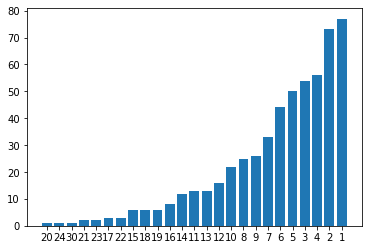

In [45]:
import matplotlib.pyplot as plt


plt.bar(*zip(*freq.items()))
plt.show()

In [46]:
 freq = dict(sorted({int(k):int(v) for k,v in freq.items()}.items()))

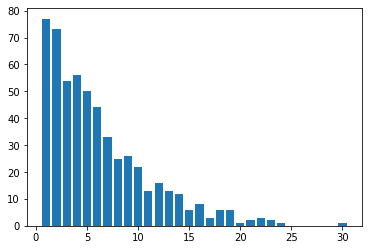

In [47]:

plt.bar(*zip(*freq.items()))
plt.show()

In [48]:
for i in sorted(list(daily_lotto_2020['Results'])):
    if i[0]=='30':
        print(i)

['30', '31', '32', '34', '36']


In [49]:
for i in sorted(list(daily_lotto_2020['Results'])):
    if int(i[0])> 19:
        print(i)

['20', '25', '28', '34', '35']
['21', '22', '24', '25', '36']
['21', '23', '25', '27', '34']
['22', '23', '28', '33', '36']
['22', '24', '31', '32', '36']
['22', '26', '29', '33', '35']
['23', '24', '27', '31', '33']
['23', '29', '30', '31', '32']
['24', '26', '30', '31', '32']
['30', '31', '32', '34', '36']


In [50]:
c = 0
for i in sorted(list(daily_lotto_2020['Results'])):
    if int(i[0])> 9:
        #print(i)
        c+=1
print(c)

115


In [63]:
# A Python program to print all  
# combinations of given length 
#from datetime import datetime
from itertools import combinations 
import datetime  
# Get all combinations of [1, 2, 3] 
# and length 2 
combi = combinations(range(1,37), 5) 

start_time = datetime.datetime.now()
# Print the obtained combinations 
total_combination = list(combi)
print(len(total_combination))


end_time = datetime.datetime.now()
print("Time is:",end_time-start_time)

376992
Time is: 0:00:00.099026


In [70]:
#first 20
total_combination[:20]

[(1, 2, 3, 4, 5),
 (1, 2, 3, 4, 6),
 (1, 2, 3, 4, 7),
 (1, 2, 3, 4, 8),
 (1, 2, 3, 4, 9),
 (1, 2, 3, 4, 10),
 (1, 2, 3, 4, 11),
 (1, 2, 3, 4, 12),
 (1, 2, 3, 4, 13),
 (1, 2, 3, 4, 14),
 (1, 2, 3, 4, 15),
 (1, 2, 3, 4, 16),
 (1, 2, 3, 4, 17),
 (1, 2, 3, 4, 18),
 (1, 2, 3, 4, 19),
 (1, 2, 3, 4, 20),
 (1, 2, 3, 4, 21),
 (1, 2, 3, 4, 22),
 (1, 2, 3, 4, 23),
 (1, 2, 3, 4, 24)]

In [71]:
#convert tuple to list
total_combination = [list(x) for x in total_combination]

In [72]:
total_combination[:20]

[[1, 2, 3, 4, 5],
 [1, 2, 3, 4, 6],
 [1, 2, 3, 4, 7],
 [1, 2, 3, 4, 8],
 [1, 2, 3, 4, 9],
 [1, 2, 3, 4, 10],
 [1, 2, 3, 4, 11],
 [1, 2, 3, 4, 12],
 [1, 2, 3, 4, 13],
 [1, 2, 3, 4, 14],
 [1, 2, 3, 4, 15],
 [1, 2, 3, 4, 16],
 [1, 2, 3, 4, 17],
 [1, 2, 3, 4, 18],
 [1, 2, 3, 4, 19],
 [1, 2, 3, 4, 20],
 [1, 2, 3, 4, 21],
 [1, 2, 3, 4, 22],
 [1, 2, 3, 4, 23],
 [1, 2, 3, 4, 24]]

In [66]:
#check

comb(36,5)

376992

In [67]:
to_int = []
for lists in list(daily_lotto_2020['Results']):
    to_int.append(list(map(int, lists)))
print(len(to_int))

553


In [73]:
to_int[:20]

[[2, 4, 5, 26, 29],
 [7, 13, 14, 17, 30],
 [4, 12, 16, 34, 36],
 [23, 29, 30, 31, 32],
 [4, 13, 16, 27, 35],
 [6, 12, 23, 25, 36],
 [8, 11, 16, 22, 25],
 [5, 11, 19, 21, 36],
 [2, 12, 13, 22, 35],
 [3, 17, 24, 31, 34],
 [3, 7, 20, 21, 35],
 [1, 5, 9, 15, 23],
 [5, 11, 21, 32, 35],
 [5, 12, 16, 20, 25],
 [8, 10, 20, 22, 27],
 [4, 19, 20, 30, 35],
 [5, 6, 7, 22, 34],
 [6, 9, 21, 24, 36],
 [11, 20, 27, 31, 36],
 [5, 9, 11, 15, 23]]

In [74]:
c=0
for i in to_int:
    if i in total_combination:
        c+=1
print(c)

553


In [85]:
376992 -534

376458

In [75]:
#checks
dict_check={'even':0,'odd':0}
for i in range(1,8):
    dict_check[i]=0

a=0
for lists in to_int:
    is_even = lambda x: x % 2 == 0
    lis2 = list(filter(is_even, lists))
    if len(lists)==list(lis2):
        dict_check['even'] +=1
        print(lists)
    elif len(lis2)==0:
        dict_check['odd'] +=1
        print(lists)
    elif list(range(lists[0],lists[-1]+1,1)) == lists:
           dict_check[1] +=1
    elif list(range(lists[0],lists[-1]+1,2)) == lists:
        dict_check[2] +=1 
              
    elif list(range(lists[0],lists[-1]+1,3)) == lists:
        dict_check[3] +=1 
    elif list(range(lists[0],lists[-1]+1,4)) == lists:
           dict_check[4] +=1
    elif list(range(lists[0],lists[-1]+1,5)) == lists:
        dict_check[5] +=1 
              
    elif list(range(lists[0],lists[-1]+1,6)) == lists:
        dict_check[6] +=1 
    elif list(range(lists[0],lists[-1]+1,7)) == lists:
        dict_check[7] +=1 
    else:a +=1
print(a)

[1, 5, 9, 15, 23]
[5, 9, 11, 15, 23]
[5, 7, 19, 31, 33]
[7, 13, 17, 23, 25]
[5, 9, 13, 25, 35]
[1, 3, 11, 15, 33]
[5, 11, 13, 19, 35]
[1, 5, 9, 15, 27]
[7, 15, 21, 31, 33]
[11, 13, 15, 19, 31]
[3, 5, 13, 15, 25]
[1, 9, 13, 15, 23]
[5, 9, 25, 29, 33]
[7, 15, 21, 27, 33]
539


In [76]:
dict_check

{'even': 0, 'odd': 14, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

In [77]:
#checks
dict_check={'even':0,'odd':0}
for i in range(1,8):
    dict_check[i]=0

a=0
for lists in total_combination:
    is_even = lambda x: x % 2 == 0
    lis2 = list(filter(is_even, lists))
    if len(lists)==list(lis2):
        dict_check['even'] +=1
        #print(lists)
    elif len(lis2)==0:
        dict_check['odd'] +=1
        #print(lists)
    elif list(range(lists[0],lists[-1]+1,1)) == lists:
           dict_check[1] +=1
    elif list(range(lists[0],lists[-1]+1,2)) == lists:
        dict_check[2] +=1 
              
    elif list(range(lists[0],lists[-1]+1,3)) == lists:
        dict_check[3] +=1 
    elif list(range(lists[0],lists[-1]+1,4)) == lists:
           dict_check[4] +=1
    elif list(range(lists[0],lists[-1]+1,5)) == lists:
        dict_check[5] +=1 
              
    elif list(range(lists[0],lists[-1]+1,6)) == lists:
        dict_check[6] +=1 
    elif list(range(lists[0],lists[-1]+1,7)) == lists:
        dict_check[7] +=1 
    else:a +=1
print(a)

368314


In [78]:
dict_check

{'even': 0, 'odd': 8568, 1: 32, 2: 14, 3: 24, 4: 10, 5: 16, 6: 6, 7: 8}

In [79]:
total_comb_rem = []
for lists in total_combination:
    is_even = lambda x: x % 2 == 0
    lis2 = list(filter(is_even, lists))
    if len(lists)==list(lis2):
        dict_check['even'] +=1
        #print(lists)
    elif len(lis2)==0:
        dict_check['odd'] +=1
        #print(lists)
    elif list(range(lists[0],lists[-1]+1,1)) == lists:
           dict_check[1] +=1
    elif list(range(lists[0],lists[-1]+1,2)) == lists:
        dict_check[2] +=1 
              
    elif list(range(lists[0],lists[-1]+1,3)) == lists:
        dict_check[3] +=1 
    elif list(range(lists[0],lists[-1]+1,4)) == lists:
           dict_check[4] +=1
    elif list(range(lists[0],lists[-1]+1,5)) == lists:
        dict_check[5] +=1 
              
    elif list(range(lists[0],lists[-1]+1,6)) == lists:
        dict_check[6] +=1 
    elif list(range(lists[0],lists[-1]+1,7)) == lists:
        dict_check[7] +=1 
    else:total_comb_rem.append(lists)
print(len(total_comb_rem))

368314


In [80]:
c=0
for lists in to_int:
    is_even = lambda x: x < 10
    lis2 = list(filter(is_even, lists))
    if len(lis2) >= 5:
        print(lists)
        c+=1
print(c)              

[2, 5, 6, 7, 9]
1


In [81]:
#remove everything less than 9
c=0
for lists in total_comb_rem:
    lis2 = list(filter(lambda x: x < 10, lists))
    if len(lis2)==5:
        total_comb_rem.remove(lists)
        c+=1
print(c)

83


In [82]:
len(total_comb_rem)

368231

In [83]:
c=0
for lists in to_int:
    if lists in total_comb_rem:
        total_comb_rem.remove(lists)
        c+=1
print(c)

538


In [85]:
len(total_comb_rem)


367693

In [86]:
total_comb_rem[:100]

[[1, 2, 3, 4, 7],
 [1, 2, 3, 4, 9],
 [1, 2, 3, 4, 10],
 [1, 2, 3, 4, 11],
 [1, 2, 3, 4, 12],
 [1, 2, 3, 4, 13],
 [1, 2, 3, 4, 14],
 [1, 2, 3, 4, 15],
 [1, 2, 3, 4, 16],
 [1, 2, 3, 4, 17],
 [1, 2, 3, 4, 18],
 [1, 2, 3, 4, 19],
 [1, 2, 3, 4, 20],
 [1, 2, 3, 4, 21],
 [1, 2, 3, 4, 22],
 [1, 2, 3, 4, 23],
 [1, 2, 3, 4, 24],
 [1, 2, 3, 4, 25],
 [1, 2, 3, 4, 26],
 [1, 2, 3, 4, 27],
 [1, 2, 3, 4, 28],
 [1, 2, 3, 4, 29],
 [1, 2, 3, 4, 30],
 [1, 2, 3, 4, 31],
 [1, 2, 3, 4, 32],
 [1, 2, 3, 4, 33],
 [1, 2, 3, 4, 34],
 [1, 2, 3, 4, 35],
 [1, 2, 3, 4, 36],
 [1, 2, 3, 5, 7],
 [1, 2, 3, 5, 9],
 [1, 2, 3, 5, 10],
 [1, 2, 3, 5, 11],
 [1, 2, 3, 5, 12],
 [1, 2, 3, 5, 13],
 [1, 2, 3, 5, 14],
 [1, 2, 3, 5, 15],
 [1, 2, 3, 5, 16],
 [1, 2, 3, 5, 17],
 [1, 2, 3, 5, 18],
 [1, 2, 3, 5, 19],
 [1, 2, 3, 5, 20],
 [1, 2, 3, 5, 21],
 [1, 2, 3, 5, 22],
 [1, 2, 3, 5, 23],
 [1, 2, 3, 5, 24],
 [1, 2, 3, 5, 25],
 [1, 2, 3, 5, 26],
 [1, 2, 3, 5, 27],
 [1, 2, 3, 5, 28],
 [1, 2, 3, 5, 29],
 [1, 2, 3, 5, 30],
 [1, 2, 3, 5, 31

In [87]:
#checks
dict_check={'even':0,'odd':0}
for i in range(1,8):
    dict_check[i]=0
a=0
for lists in total_comb_rem:
    if list(range(lists[0],lists[-1]+1,1))[:3] == lists[:3]:
           dict_check[1] +=1
    elif list(range(lists[0],lists[-1]+1,2))[:3] == lists[:3]:
        dict_check[2] +=1 
              
    elif list(range(lists[0],lists[-1]+1,3))[:3] == lists[:3]:
        dict_check[3] +=1 
    elif list(range(lists[0],lists[-1]+1,4))[:3] == lists[:3]:
           dict_check[4] +=1
    elif list(range(lists[0],lists[-1]+1,5))[:3] == lists[:3]:
        dict_check[5] +=1 
              
    elif list(range(lists[0],lists[-1]+1,6))[:3] == lists[:3]:
        dict_check[6] +=1 
    elif list(range(lists[0],lists[-1]+1,7))[:3] == lists[:3]:
        dict_check[7] +=1 
    else:a +=1
print(a)

344567


In [88]:
dict_check

{'even': 0,
 'odd': 0,
 1: 5925,
 2: 4368,
 3: 4029,
 4: 2900,
 5: 2578,
 6: 1795,
 7: 1531}

In [89]:
#checks
dict_check={'even':0,'odd':0}
for i in range(1,8):
    dict_check[i]=0
a=0
for lists in to_int:
    if list(range(lists[0],lists[3]+1,1))[:3] == lists[:3]:
        dict_check[1] +=1
        print(lists)
    elif list(range(lists[0],lists[3]+1,2))[:3] == lists[:3]:
        dict_check[2] +=1 
        print(lists)
              
    elif list(range(lists[0],lists[3]+1,3))[:3] == lists[:3]:
        dict_check[3] +=1 
    elif list(range(lists[0],lists[3]+1,4))[:3] == lists[:3]:
           dict_check[4] +=1
    elif list(range(lists[0],lists[3]+1,5))[:3] == lists[:3]:
        dict_check[5] +=1 
              
    elif list(range(lists[0],lists[3]+1,6))[:3]== lists[:3]:
        dict_check[6] +=1 
    elif list(range(lists[0],lists[3]+1,7))[:3]== lists[:3]:
        dict_check[7] +=1 
    else:a +=1
print(a)

[5, 6, 7, 22, 34]
[21, 23, 25, 27, 34]
[5, 6, 7, 9, 28]
[14, 15, 16, 17, 27]
[1, 3, 5, 18, 35]
[8, 9, 10, 21, 36]
[2, 4, 6, 29, 33]
[10, 12, 14, 20, 22]
[11, 13, 15, 19, 31]
[10, 11, 12, 19, 23]
[7, 9, 11, 19, 26]
[14, 16, 18, 23, 29]
[13, 14, 15, 24, 31]
[30, 31, 32, 34, 36]
[6, 8, 10, 30, 33]
[9, 11, 13, 14, 19]
[1, 3, 5, 14, 22]
[19, 20, 21, 33, 34]
[2, 4, 6, 9, 12]
[3, 5, 7, 10, 15]
512


In [90]:
#checks
dict_check={'even':0,'odd':0}
for i in range(1,8):
    dict_check[i]=0
a=0
for lists in to_int:
    if list(range(lists[0],lists[3]+1,1))[:4] == lists[:4]:
        dict_check[1] +=1
        print(lists)
    elif list(range(lists[0],lists[3]+1,2))[:4] == lists[:4]:
        dict_check[2] +=1 
        print(lists)
              
    elif list(range(lists[0],lists[3]+1,3))[:4] == lists[:4]:
        dict_check[3] +=1 
    elif list(range(lists[0],lists[3]+1,4))[:4] == lists[:4]:
           dict_check[4] +=1
    elif list(range(lists[0],lists[3]+1,5))[:4] == lists[:4]:
        dict_check[5] +=1 
              
    elif list(range(lists[0],lists[3]+1,6))[:4] == lists[:4]:
        dict_check[6] +=1 
    elif list(range(lists[0],lists[3]+1,7))[:4] == lists[:4]:
        dict_check[7] +=1 
    else:a +=1
print(a)

[21, 23, 25, 27, 34]
[14, 15, 16, 17, 27]
551


In [91]:
dict_check

{'even': 0, 'odd': 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

In [92]:
#remove counting numbers with one deviation
a=0
for lists in total_comb_rem:
    if list(range(lists[0],lists[3]+1))[:3] == lists[:3]:
        total_comb_rem.remove(lists)
    elif (list(range(lists[0],lists[3]+1,2))[:3] == lists[:3]) :
        total_comb_rem.remove(lists)
              
    elif list(range(lists[0],lists[3]+1,3))[:3] == lists[:3]:
        total_comb_rem.remove(lists) 
    elif list(range(lists[0],lists[3]+1,4))[:3]== lists[:3]:
           total_comb_rem.remove(lists)
    elif list(range(lists[0],lists[3]+1,5))[:3] == lists[:3]:
        total_comb_rem.remove(lists)
              
    elif list(range(lists[0],lists[3]+1,6))[:3] == lists[:3]:
        total_comb_rem.remove(lists) 
    elif list(range(lists[0],lists[3]+1,7))[:3] == lists[:3]:
        total_comb_rem.remove(lists)
    else:a +=1
print(a)

344473


In [94]:
print(len(total_comb_rem))
total_comb_rem[:20]


356083


[[1, 2, 3, 4, 9],
 [1, 2, 3, 4, 11],
 [1, 2, 3, 4, 13],
 [1, 2, 3, 4, 15],
 [1, 2, 3, 4, 17],
 [1, 2, 3, 4, 19],
 [1, 2, 3, 4, 21],
 [1, 2, 3, 4, 23],
 [1, 2, 3, 4, 25],
 [1, 2, 3, 4, 27],
 [1, 2, 3, 4, 29],
 [1, 2, 3, 4, 31],
 [1, 2, 3, 4, 33],
 [1, 2, 3, 4, 35],
 [1, 2, 3, 5, 7],
 [1, 2, 3, 5, 10],
 [1, 2, 3, 5, 12],
 [1, 2, 3, 5, 14],
 [1, 2, 3, 5, 16],
 [1, 2, 3, 5, 18]]

In [95]:
for i in to_int:
    if i[0]==1 & i[1]==2 & i[2]==3:
        print(i)

In [96]:
freq.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 30])

In [97]:
first_3 = {}
for lists in to_int:
    a = json.dumps(lists[:3])
    #s = ''.join(a)
    if (list(range(lists[0],lists[3]+1,1))[:4] == lists[:4]) & (a in list(first_3.keys())):
        first_3[a] +=1
    else: first_3[a] =1
        
first_3

{'[2, 4, 5]': 1,
 '[7, 13, 14]': 1,
 '[4, 12, 16]': 1,
 '[23, 29, 30]': 1,
 '[4, 13, 16]': 1,
 '[6, 12, 23]': 1,
 '[8, 11, 16]': 1,
 '[5, 11, 19]': 1,
 '[2, 12, 13]': 1,
 '[3, 17, 24]': 1,
 '[3, 7, 20]': 1,
 '[1, 5, 9]': 1,
 '[5, 11, 21]': 1,
 '[5, 12, 16]': 1,
 '[8, 10, 20]': 1,
 '[4, 19, 20]': 1,
 '[5, 6, 7]': 1,
 '[6, 9, 21]': 1,
 '[11, 20, 27]': 1,
 '[5, 9, 11]': 1,
 '[5, 7, 19]': 1,
 '[4, 14, 22]': 1,
 '[6, 8, 9]': 1,
 '[8, 9, 22]': 1,
 '[2, 21, 29]': 1,
 '[1, 16, 21]': 1,
 '[3, 6, 9]': 1,
 '[4, 8, 22]': 1,
 '[1, 21, 30]': 1,
 '[3, 4, 14]': 1,
 '[16, 22, 26]': 1,
 '[22, 23, 28]': 1,
 '[4, 12, 17]': 1,
 '[9, 25, 34]': 1,
 '[2, 7, 15]': 1,
 '[4, 8, 18]': 1,
 '[6, 12, 19]': 1,
 '[11, 22, 27]': 1,
 '[6, 15, 19]': 1,
 '[4, 11, 12]': 1,
 '[4, 8, 19]': 1,
 '[21, 23, 25]': 1,
 '[7, 14, 20]': 1,
 '[6, 16, 18]': 1,
 '[1, 2, 9]': 1,
 '[5, 7, 16]': 1,
 '[8, 12, 15]': 1,
 '[7, 13, 17]': 1,
 '[2, 7, 9]': 1,
 '[9, 13, 26]': 1,
 '[10, 20, 23]': 1,
 '[1, 2, 7]': 1,
 '[13, 23, 30]': 1,
 '[3, 5, 19]

In [98]:
for lists in to_int:

    if (list(range(lists[0],lists[3]+1,1))[:4] == lists[:4]) & (a in list(first_3.keys())):
        first_3[a] +=1
    else: first_3[a] =1

In [99]:
len(first_3)

486

In [184]:
#export to csv
pd.DataFrame({"winning numbers":total_comb_rem}).to_csv('winnnig_number.csv')

In [191]:
daily_lotto_2020.loc[[5]]

,index,Draw Date,Results,Number of Winners
5,5,Thursday 26 December 2019,"[6, 12, 23, 25, 36]",61556


In [195]:
exec('int')